# Feature importance
* Our main goal is to figure out what are the most important features

In [27]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

### Observations about data quality: its as clean as it gets
* The column ID_code is unique on both datasets, we use it as index
* All our features have dtype=float64 except target which has dtype=int64
* The dataframes do not have empty values
* The distribution of the features is apparently normal.
* The features are not Pearson-correlated (weird, right?)

In [28]:
train_csv = pd.read_csv('train.csv').set_index('ID_code')
test_csv = pd.read_csv('test.csv').set_index('ID_code')
X = train_csv.drop(columns = 'target')
y = train_csv.target

## What features are 'highly correlated'?
* https://scikit-learn.org/stable/modules/feature_selection.html
* https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/
* Pearson correlation and p values: https://blog.datadive.net/selecting-good-features-part-i-univariate-selection/

In [38]:
X_corr_abs = X.corr().abs()
X_corr_abs.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02,200.000000,200.000000,200.000000,...,200.000000,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.007254,0.007227,0.007434,0.006696,0.006739,0.006868,7.418106e-03,0.006628,0.006801,0.007089,...,0.007349,7.086370e-03,0.007121,0.006917,0.006824,0.006978,0.007027,0.007070,0.007230,0.006941
std,0.070571,0.070572,0.070561,0.070601,0.070599,0.070591,7.055978e-02,0.070605,0.070595,0.070581,...,0.070564,7.058194e-02,0.070579,0.070590,0.070593,0.070586,0.070584,0.070579,0.070573,0.070587
min,0.000036,0.000008,0.000002,0.000010,0.000004,0.000002,5.942735e-08,0.000022,0.000011,0.000014,...,0.000085,2.703975e-08,0.000006,0.000011,0.000068,0.000013,0.000008,0.000005,0.000047,0.000011
25%,0.000977,0.000993,0.000937,0.000726,0.000808,0.000779,1.035549e-03,0.000652,0.000722,0.000805,...,0.000996,8.077456e-04,0.000840,0.000790,0.000827,0.000805,0.000695,0.000755,0.000960,0.000804
50%,0.001858,0.001988,0.002125,0.001528,0.001434,0.001604,2.251201e-03,0.001477,0.001569,0.001744,...,0.002067,1.738053e-03,0.001763,0.001702,0.001539,0.001718,0.001772,0.001996,0.001760,0.001671
75%,0.003195,0.003282,0.003579,0.002427,0.002631,0.002831,3.376090e-03,0.002431,0.002654,0.003149,...,0.003413,3.115277e-03,0.003208,0.002583,0.002584,0.002814,0.002948,0.002973,0.003031,0.002895
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
for ind in X.columns:
    for col in X.columns:
        if X_corr_abs.loc[ind,col]>0.5 and ind!=col:
            print ind, col

## Feature importance using lasso

In [40]:
pipeline_steps = []
pipeline_steps.append(('StandardScaler', StandardScaler()))
pipeline_steps.append(('LogisticRegression', LogisticRegression(penalty='l1')))
model = Pipeline(pipeline_steps)
parameters = {'LogisticRegression__C': 10**np.linspace(-4,-2, 50)}
clf = GridSearchCV(model, parameters, cv=2, scoring='roc_auc', return_train_score=True);
clf.fit(X, y)

/Users/lduque/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('StandardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LogisticRegression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'LogisticRegression__C': array([0.0001 , 0.00011, 0.00012, 0.00013, 0.00015, 0.00016, 0.00018,
       0.00019, 0.00021, 0.00023, 0.00026, 0.00028, 0.00031, 0.00034,
       0.00037, 0.00041, 0.00045, 0.00049, 0.00054, 0.0006 , 0.00066,
       0.00072, 0.00079, 0.00087, 0.00095, 0.00105, 0...29, 0.00471,
       0.00518, 0.00569, 0.00625, 0.00687, 0.00754, 0.00829, 0.0091 ,
       0.01   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True

In [41]:
clf.cv_results_
mean_test_scores = clf.cv_results_['mean_test_score']
C = clf.cv_results_['param_LogisticRegression__C']
df_scores= pd.DataFrame({'mean_test_scores':mean_test_scores}, index=C)

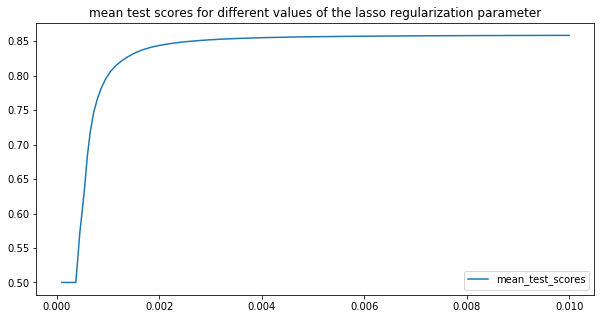

In [57]:
df_scores.plot(title='mean test scores for different values of the lasso regularization parameter', figsize=(10,5));

In [43]:
df_scores

,mean_test_scores
0.000100,0.500000
0.000110,0.500000
0.000121,0.500000
0.000133,0.500000
0.000146,0.500000
0.000160,0.500000
0.000176,0.500000
0.000193,0.500000
0.000212,0.500000
0.000233,0.500000


In [44]:
C_chosen = 0.003
parameters = {'LogisticRegression__C': [C_chosen]}
clf = GridSearchCV(model, parameters, cv=2, scoring='roc_auc', return_train_score=True)
clf.fit(X, y)
print clf.cv_results_['mean_test_score']

[0.85215352]


In [45]:
lasso_weights = pd.Series(clf.best_estimator_.named_steps['LogisticRegression'].coef_[0], index=X.columns) 
print 'number of features that are NOT relevant for the chosen lasso model: ', (lasso_weights==0).sum()
print 'total number of features: ', len(lasso_weights)

number of features that are NOT relevant for the chosen lasso model:  30
total number of features:  200


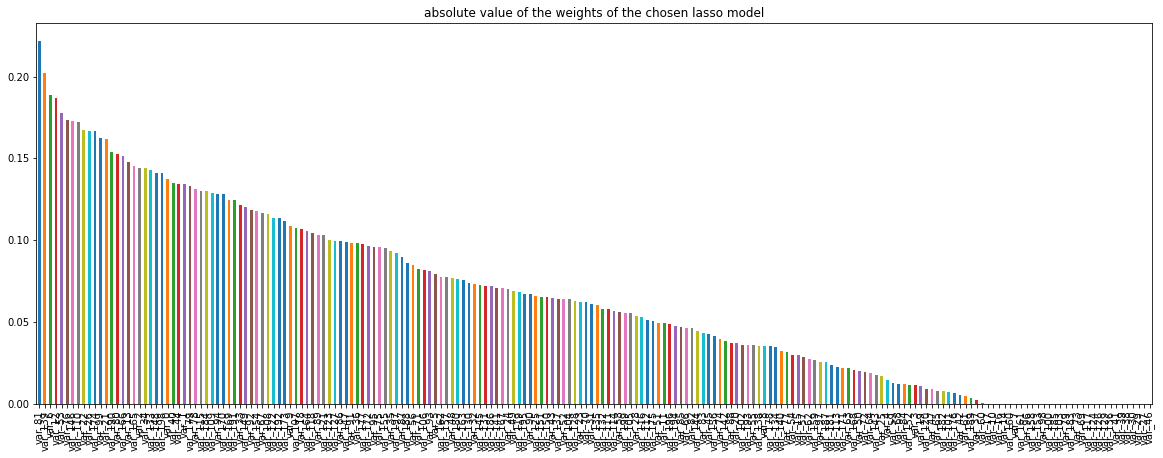

In [46]:
abs_lasso_weights = lasso_weights.apply(np.abs)
abs_lasso_weights.sort_values(ascending=False).plot.bar(figsize=(20, 7), title='absolute value of the weights of the chosen lasso model');

## Feature importance using random forests

In [47]:
%%time
model = RandomForestClassifier()
parameters = {
    'n_estimators': [100], 
    'max_depth': [25] 
}
clf = GridSearchCV(model, parameters, cv=2, scoring='roc_auc', return_train_score=True)
clf.fit(X, y)

CPU times: user 15min 44s, sys: 4.83 s, total: 15min 49s
Wall time: 23min 49s


In [59]:
clf.cv_results_

{'mean_fit_time': array([461.97087991]),
 'mean_score_time': array([2.5721221]),
 'mean_test_score': array([0.81961904]),
 'mean_train_score': array([0.99964574]),
 'param_max_depth': masked_array(data=[25],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 25, 'n_estimators': 100}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.81673806]),
 'split0_train_score': array([0.99958893]),
 'split1_test_score': array([0.82250002]),
 'split1_train_score': array([0.99970255]),
 'std_fit_time': array([242.58919394]),
 'std_score_time': array([0.06400609]),
 'std_test_score': array([0.00288098]),
 'std_train_score': array([5.68088287e-05])}

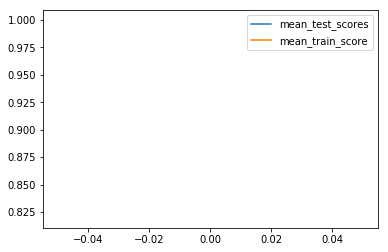

In [48]:
mean_test_scores = clf.cv_results_['mean_test_score']
mean_train_scores = clf.cv_results_['mean_train_score']
dh = pd.DataFrame({'mean_train_score':mean_train_scores, 'mean_test_scores':mean_test_scores}).sort_values(by='mean_test_scores').reset_index().drop(columns='index')
dh.plot()

In [58]:
dh

,mean_test_scores,mean_train_score
0,0.819619,0.999646


In [50]:
feature_importance_rf = pd.Series(clf.best_estimator_.feature_importances_, index=X.columns)

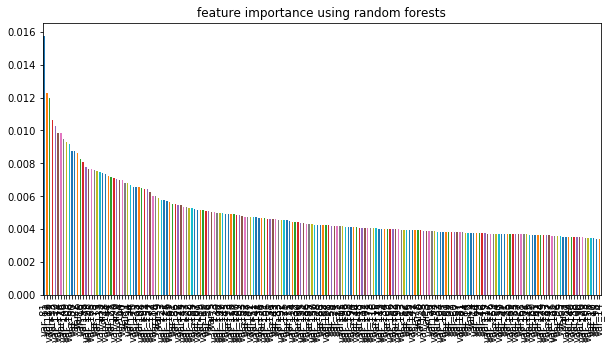

In [51]:
feature_importance_rf.sort_values(ascending=False).plot.bar(figsize=(10,5), title='feature importance using random forests');

In [61]:
feature_importance = pd.concat([feature_importance_rf, abs_lasso_weights], axis=1)
feature_importance.columns = ['tree_importance', 'linear_importance']
feature_importance.to_csv('feature_importance.csv', index=False)

In [65]:
feature_importance = feature_importance.sort_values(by='linear_importance', ascending=False)
feature_importance['linear_rank'] = np.linspace(1,len(feature_importance),len(feature_importance))
feature_importance = feature_importance.sort_values(by='tree_importance', ascending=False)
feature_importance['tree_rank'] = np.linspace(1,len(feature_importance),len(feature_importance))
feature_importance['average_rank'] = (feature_importance.linear_rank + feature_importance.tree_rank)/2
feature_importance.sort_values(by = 'average_rank').head()
feature_importance.index.name='feature'
feature_importance.to_csv('feature_importance.csv')

In [66]:
feature_importance.head()

,tree_importance,linear_importance,linear_rank,tree_rank,average_rank
feature,,,,,
var_81,0.015771,0.221647,1.0,1.0,1.0
var_12,0.012252,0.187078,4.0,2.0,3.0
var_139,0.011978,0.202066,2.0,3.0,2.5
var_53,0.010661,0.177735,5.0,4.0,4.5
var_110,0.010287,0.172094,8.0,5.0,6.5
